# Boom Bikes
Our goal to find the below points.
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands.

As per the description, we need to find bike demands which is count in the data. So target/ dependant feature is count, remaining are input/independent features.

## Libraries Import

In [39]:
# libraries import
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

sns.set_context("notebook")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', 0)

## Load Data from CSV file

In [40]:
# read csv
df = pd.read_csv('./day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data understanding, preparation and EDA

In [41]:
# display dataframe shape
df.shape

(730, 16)

In [42]:
# display columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [43]:
# verify columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [44]:
# display data frame description to check the spread 
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [45]:
# check null values count column wise
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Data tranformation

In [46]:
# change column names to appropriate names
df.columns = ['index', 'date', 'season', 'year', 'month', 'is_holiday', 'weekday', \
              'is_workingday', 'weather', 'temperature', 'feeling_temperature', 'humidity', \
             'windspeed', 'casual_users', 'registered_users', 'count_of_rental_bikes']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  730 non-null    int64  
 1   date                   730 non-null    object 
 2   season                 730 non-null    int64  
 3   year                   730 non-null    int64  
 4   month                  730 non-null    int64  
 5   is_holiday             730 non-null    int64  
 6   weekday                730 non-null    int64  
 7   is_workingday          730 non-null    int64  
 8   weather                730 non-null    int64  
 9   temperature            730 non-null    float64
 10  feeling_temperature    730 non-null    float64
 11  humidity               730 non-null    float64
 12  windspeed              730 non-null    float64
 13  casual_users           730 non-null    int64  
 14  registered_users       730 non-null    int64  
 15  count_

In [47]:
# convert dteday from object to datetime
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  730 non-null    int64         
 1   date                   730 non-null    datetime64[ns]
 2   season                 730 non-null    int64         
 3   year                   730 non-null    int64         
 4   month                  730 non-null    int64         
 5   is_holiday             730 non-null    int64         
 6   weekday                730 non-null    int64         
 7   is_workingday          730 non-null    int64         
 8   weather                730 non-null    int64         
 9   temperature            730 non-null    float64       
 10  feeling_temperature    730 non-null    float64       
 11  humidity               730 non-null    float64       
 12  windspeed              730 non-null    float64       
 13  casua

In [48]:
# understanding range for season, year, month, weekday, weather which are categorical variables
def print_unique_values(feature):
    print(feature, ':', df[feature].unique().tolist())
categorical_feature_list = ['season', 'year', 'month', 'weekday', 'weather', 'is_holiday', \
                            'is_workingday']
for feature in categorical_feature_list:
    print_unique_values(feature)

season : [1, 2, 3, 4]
year : [0, 1]
month : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
weekday : [6, 0, 1, 2, 3, 4, 5]
weather : [2, 1, 3]
is_holiday : [0, 1]
is_workingday : [0, 1]


In [49]:
# replace codes(digits) with actual text(categorical) values from data dictionary to prepare 
# categorical variables, there is no heavyrain data in dataframe.
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['year'] = df['year'].map({0:2018, 1:2019})
df['month'] = df['month'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', \
                     7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
df['weekday'] = df['weekday'].map({0:'sunday', 1:'monday', 2:'tuesday', 3:'wednesday', \
                        4:'thursday', 5:'friday', 6:'saturday'})
df['weather'] = df['weather'].map({1:'clear', 2:'mist', 3:'lightrain', 4:'heavyrain'})
df['is_holiday'] = df['is_holiday'].map({1:'holiday', 0:'not_holiday'})
df['is_workingday'] = df['is_workingday'].map({1:'workingday', 0:'not_workingday'})
df.head(5)

,index,date,season,year,month,is_holiday,weekday,is_workingday,weather,temperature,feeling_temperature,humidity,windspeed,casual_users,registered_users,count_of_rental_bikes
0,1,2018-01-01,spring,2018,jan,not_holiday,saturday,not_workingday,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,jan,not_holiday,sunday,not_workingday,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,jan,not_holiday,monday,workingday,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,jan,not_holiday,tuesday,workingday,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,jan,not_holiday,wednesday,workingday,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [50]:
# converting type for season, year, month, weekday, weather to "categorical values"
for feature in categorical_feature_list:
    df[feature] = df[feature].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  730 non-null    int64         
 1   date                   730 non-null    datetime64[ns]
 2   season                 730 non-null    category      
 3   year                   730 non-null    category      
 4   month                  730 non-null    category      
 5   is_holiday             730 non-null    category      
 6   weekday                730 non-null    category      
 7   is_workingday          730 non-null    category      
 8   weather                730 non-null    category      
 9   temperature            730 non-null    float64       
 10  feeling_temperature    730 non-null    float64       
 11  humidity               730 non-null    float64       
 12  windspeed              730 non-null    float64       
 13  casua

we can clearly observe when we change the data type of features from object to category, memory got decreased from 91.4 KB to 57.9 KB

In [51]:
# year and month data already included, so dropping date colum
df.drop('date', axis='columns', inplace=True)

# as per data dictionary casual users and registered users are combined with count of rental
# bikes, so we can drop causual_users, registered_users from data frame 
df.drop(['casual_users', 'registered_users'], axis='columns', inplace=True)

# as there is no significance for index, we don't consider it for model building. but change the
# index to this
df.set_index('index', inplace=True)

In [52]:
# checking whether is_workingday and is_holiday are representing same data with negation
df[['is_workingday']].value_counts(), df[['is_holiday']].value_counts()

(is_workingday 
 workingday        499
 not_workingday    231
 dtype: int64,
 is_holiday 
 not_holiday    709
 holiday         21
 dtype: int64)

As per above data, is_workingday and is_holiday are different

In [53]:
# as per data description, we can find below features as numerical
numerical_features = ['temperature', 'feeling_temperature', 'humidity', \
                      'windspeed', 'count_of_rental_bikes']

In [54]:
df[numerical_features].describe()

,temperature,feeling_temperature,humidity,windspeed,count_of_rental_bikes
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


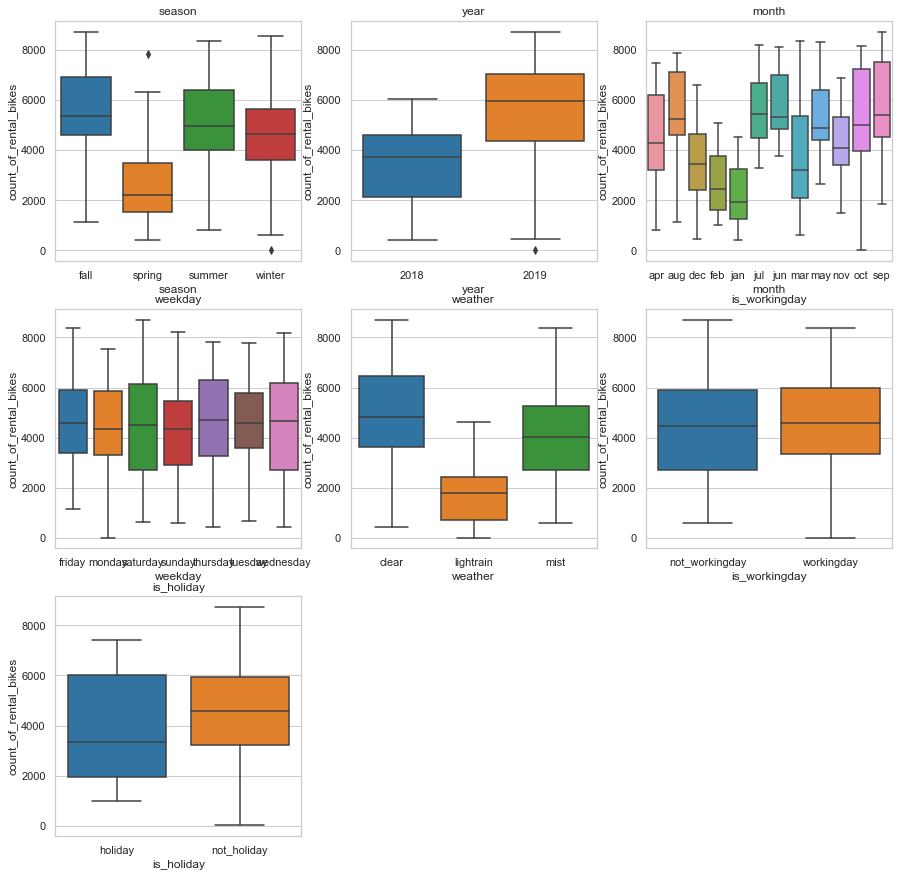

In [55]:
# validating the target 'count' behavior based on categorical features 'season', 'year', 'month', 'weekday',
# 'weather', 'is_workingday','is_holiday'
sns.set_context("notebook")
plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
plt.title('season')
sns.boxplot(x='season', y='count_of_rental_bikes', data=df)

plt.subplot(3, 3, 2)
plt.title('year')
sns.boxplot(x='year', y='count_of_rental_bikes', data=df)

plt.subplot(3, 3, 3)
plt.title('month')
sns.boxplot(x='month', y='count_of_rental_bikes', data=df)

plt.subplot(3, 3, 4)
plt.title('weekday')
sns.boxplot(x='weekday', y='count_of_rental_bikes', data=df)

plt.subplot(3, 3, 5)
plt.title('weather')
sns.boxplot(x='weather', y='count_of_rental_bikes', data=df)

plt.subplot(3, 3, 6)
plt.title('is_workingday')
sns.boxplot(x='is_workingday', y='count_of_rental_bikes', data=df)

plt.subplot(3, 3, 7)
plt.title('is_holiday')
sns.boxplot(x='is_holiday', y='count_of_rental_bikes', data=df)

plt.show()

### Categorical Features EDA Observations:
- Count of Rental Bikes is more during the Fall and very low in Spring. 
- Count of Rental Bikes is more during 2019 year.
- As per monthly data, count of Rentals are varying more monthly.
- There is no much change in the Rentals based on Weekdays and Working Day.
- People are preferring to rent a bike if the weather is clear and preferring low, if there is a rain.
- People are preferring bikes on Not Holidays

There are no much outliers observed in the Boxplot. So we are not dropping any outliers data.

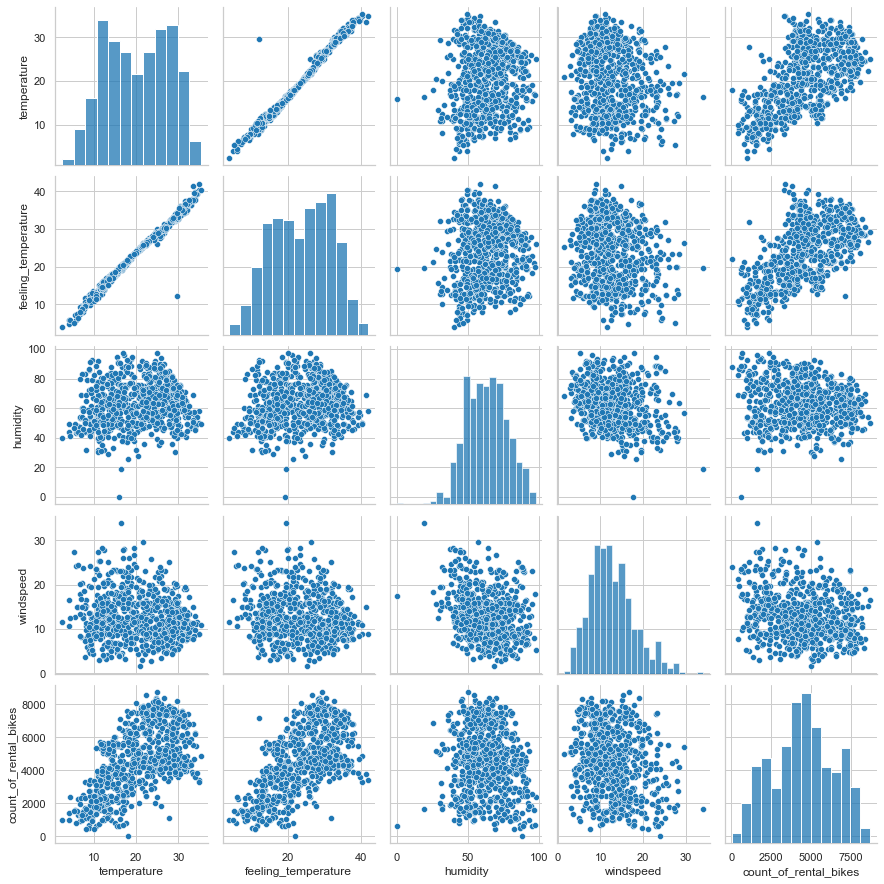

In [56]:
# bi-variate analysis for numerical features
sns.set_style('whitegrid')
sns.pairplot(df[numerical_features])

### Numerical Features EDA Observations:
- We can observe the correlation for **{temperature and feeling temperature}**.
- We can observe the correlation for **Count of Rental Bikes with {temperature and feeling temperature}**.
- Remaining Numerical features are scattered without any that much relationship wit Count of Rental Bikes.

We will draw clear correlation figures with heatmap.

<AxesSubplot:>

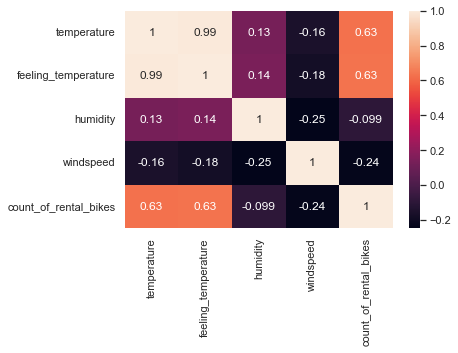

In [57]:
# numerical features correlation heatmap
df_numerical = df[numerical_features]
sns.heatmap(df_numerical.corr(), annot=True, )

In [58]:
# as there is high correlation 0.99 between temperature and feeling_temperature, we can drop anyone from df
df.drop('feeling_temperature', inplace=True, axis='columns')
df.columns

Index(['season', 'year', 'month', 'is_holiday', 'weekday', 'is_workingday',
       'weather', 'temperature', 'humidity', 'windspeed',
       'count_of_rental_bikes'],
      dtype='object')

In [59]:
# final features list
final_categorical = ['season', 'year', 'month', 'is_holiday', 'weekday', 'is_workingday', 'weather']
final_numerical = ['temperature', 'humidity', 'windspeed', 'count_of_rental_bikes']

In [60]:
# create dummy variables for categorical features
df_with_dummies = pd.get_dummies(df, columns=final_categorical, drop_first=True)
df_with_dummies.head() 

,temperature,humidity,windspeed,count_of_rental_bikes,season_spring,season_summer,season_winter,year_2019,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,is_holiday_not_holiday,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,is_workingday_workingday,weather_lightrain,weather_mist
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
3,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
4,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
5,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0


In [61]:
df_with_dummies[final_numerical].describe()

,temperature,humidity,windspeed,count_of_rental_bikes
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


In [62]:
# we can observe the numerical features having big numbers, so it is better to normalize.
scaler = MinMaxScaler()
scaler.fit(df_with_dummies[final_numerical])
df_with_dummies[final_numerical] = scaler.transform(df_with_dummies[final_numerical])
df_with_dummies[final_numerical].describe()

,temperature,humidity,windspeed,count_of_rental_bikes
count,730.000000,730.000000,730.000000,730.000000
mean,0.543852,0.645400,0.346568,0.516108
std,0.228140,0.146402,0.159873,0.222735
min,0.000000,0.000000,0.000000,0.000000
25%,0.346084,0.534704,0.232045,0.362143
50%,0.548307,0.643959,0.326928,0.520766
75%,0.743261,0.750535,0.434629,0.683847
max,1.000000,1.000000,1.000000,1.000000


In [63]:
df_with_dummies.head()

,temperature,humidity,windspeed,count_of_rental_bikes,season_spring,season_summer,season_winter,year_2019,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,is_holiday_not_holiday,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,is_workingday_workingday,weather_lightrain,weather_mist
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.355170,0.828620,0.284606,0.110792,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2,0.379232,0.715771,0.466215,0.089623,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
3,0.171000,0.449638,0.465740,0.152669,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
4,0.175530,0.607131,0.284297,0.177174,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
5,0.209120,0.449313,0.339143,0.181546,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0


In [64]:
# create training and test data
y = df_with_dummies.pop('count_of_rental_bikes') # poping out count of rental bikes
X = df_with_dummies

X = sm.add_constant(X)  # add constant value for the input dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((584, 29), (584,), (146, 29), (146,))

# Model building:

In [65]:
# build model with all features
ols = sm.OLS(y_train, sm.add_constant(X_train))
model = ols.fit()
model.params

const                       0.284510
temperature                 0.436331
humidity                   -0.152070
windspeed                  -0.154540
season_spring              -0.081236
season_summer               0.003611
season_winter               0.105199
year_2019                   0.233229
month_aug                  -0.001304
month_dec                  -0.073200
month_feb                  -0.037133
month_jan                  -0.054070
month_jul                  -0.051107
month_jun                   0.012353
month_mar                   0.007472
month_may                   0.024481
month_nov                  -0.079276
month_oct                  -0.012236
month_sep                   0.063536
is_holiday_not_holiday      0.050660
weekday_monday             -0.017518
weekday_saturday            0.038701
weekday_sunday             -0.016057
weekday_thursday           -0.000105
weekday_tuesday            -0.015984
weekday_wednesday          -0.000574
is_workingday_workingday    0.028016
w

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     count_of_rental_bikes   R-squared:                       0.854
Model:                               OLS   Adj. R-squared:                  0.847
Method:                    Least Squares   F-statistic:                     120.2
Date:                   Thu, 23 Nov 2023   Prob (F-statistic):          3.30e-212
Time:                           02:12:08   Log-Likelihood:                 597.61
No. Observations:                    584   AIC:                            -1139.
Df Residuals:                        556   BIC:                            -1017.
Df Model:                             27                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2845      0.048      5.886      0.000       0.190       0.379
temperature                  0.4363      0.043     10.187      0.000       0.352       0.520
humidity                    -0.1521      0.037     -4.161      0.000      -0.224      -0.080
windspeed                   -0.1545      0.026     -6.016      0.000      -0.205      -0.104
season_spring               -0.0812      0.027     -2.966      0.003      -0.135      -0.027
season_summer                0.0036      0.023      0.156      0.876      -0.042       0.049
season_winter                0.1052      0.025      4.139      0.000       0.055       0.155
year_2019                    0.2332      0.008     30.816      0.000       0.218       0.248
month_aug                   -0.0013      0.031     -0.043      0.966      -0.061       0.059
month_dec                   -0.0732      0.031     -2.332      0.020      -0.135      -0.012
month_feb                   -0.0371      0.032     -1.178      0.239      -0.099       0.025
month_jan                   -0.0541      0.033     -1.646      0.100      -0.119       0.010
month_jul                   -0.0511      0.032     -1.605      0.109      -0.114       0.011
month_jun                    0.0124      0.022      0.558      0.577      -0.031       0.056
month_mar                    0.0075      0.024      0.309      0.758      -0.040       0.055
month_may                    0.0245      0.020      1.252      0.211      -0.014       0.063
month_nov                   -0.0793      0.034     -2.330      0.020      -0.146      -0.012
month_oct                   -0.0122      0.033     -0.372      0.710      -0.077       0.052
month_sep                    0.0635      0.029      2.222      0.027       0.007       0.120
is_holiday_not_holiday       0.0507      0.018      2.785      0.006       0.015       0.086
weekday_monday              -0.0175      0.014     -1.225      0.221      -0.046       0.011
weekday_saturday             0.0387      0.011      3.577      0.000       0.017       0.060
weekday_sunday              -0.0161      0.011     -1.496      0.135      -0.037       0.005
weekday_thursday            -0.0001      0.014     -0.008      0.994      -0.027       0.027
weekday_tuesday             -0.0160      0.014     -1.114      0.266      -0.044       0.012
weekday_wednesday           -0.0006      0.014     -0.041      0.967      -0.028       0.027
is_workingday_workingday     0.0280      0.009      3.250      0.001       0.011       0.045
weather_lightrain           -0.2472      0.025     -9.989      0.000      -0.296      -0.199
weather_mist                -0.0621      0.010     -6.251      0.000      -0.082      -0.043
==========================================================================

In [67]:
# model evaluation
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.8121544291616278

### Residual Analysis

<AxesSubplot:ylabel='Density'>

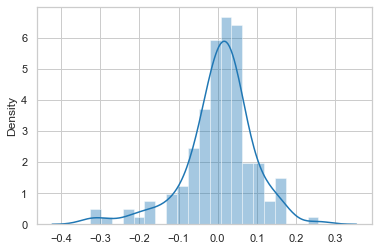

In [68]:
res = y_test - y_pred
sns.distplot(res)

In [69]:
# get the features with p-value less than 0.1
features_with_1 = model.pvalues[model.pvalues<0.1].index.tolist()

# get the features with p-value less than 0.5
features_with_005 = model.pvalues[model.pvalues<0.005].index.tolist()

features_with_1, features_with_005

(['const',
  'temperature',
  'humidity',
  'windspeed',
  'season_spring',
  'season_winter',
  'year_2019',
  'month_dec',
  'month_nov',
  'month_sep',
  'is_holiday_not_holiday',
  'weekday_saturday',
  'is_workingday_workingday',
  'weather_lightrain',
  'weather_mist'],
 ['const',
  'temperature',
  'humidity',
  'windspeed',
  'season_spring',
  'season_winter',
  'year_2019',
  'weekday_saturday',
  'is_workingday_workingday',
  'weather_lightrain',
  'weather_mist'])

## Model Building with 0.05 and 0.1 P-value features

### Model building with 0.1 P-value features

In [70]:
model_1 = sm.OLS(y_train, X_train[features_with_1]).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     count_of_rental_bikes   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     221.2
Date:                   Thu, 23 Nov 2023   Prob (F-statistic):          1.94e-219
Time:                           02:12:08   Log-Likelihood:                 580.29
No. Observations:                    584   AIC:                            -1131.
Df Residuals:                        569   BIC:                            -1065.
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2719      0.038      7.100      0.000       0.197       0.347
temperature                  0.4231      0.027     15.421      0.000       0.369       0.477
humidity                    -0.1489      0.035     -4.203      0.000      -0.218      -0.079
windspeed                   -0.1438      0.026     -5.599      0.000      -0.194      -0.093
season_spring               -0.1157      0.014     -8.182      0.000      -0.143      -0.088
season_winter                0.0894      0.013      6.937      0.000       0.064       0.115
year_2019                    0.2349      0.008     30.803      0.000       0.220       0.250
month_dec                   -0.0550      0.015     -3.582      0.000      -0.085      -0.025
month_nov                   -0.0661      0.017     -3.799      0.000      -0.100      -0.032
month_sep                    0.0668      0.014      4.838      0.000       0.040       0.094
is_holiday_not_holiday       0.0479      0.024      1.974      0.049       0.000       0.096
weekday_saturday             0.0553      0.014      3.936      0.000       0.028       0.083
is_workingday_workingday     0.0391      0.011      3.600      0.000       0.018       0.060
weather_lightrain           -0.2476      0.025     -9.952      0.000      -0.296      -0.199
weather_mist                -0.0600      0.010     -5.984      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       89.183   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.236
Skew:                          -0.776   Prob(JB):                     6.13e-51
Kurtosis:                       5.663   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# model evaluation
y_pred_1 = model_1.predict(X_test[features_with_1])
r2_score(y_test, y_pred_1)

0.7938242376775373

### Residual Analysis

<AxesSubplot:ylabel='Density'>

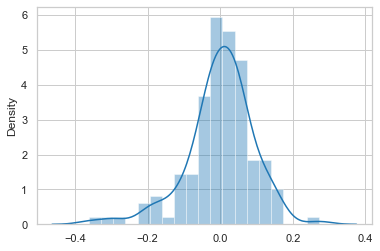

In [72]:
res1 = y_test - y_pred_1
sns.distplot(res1)

### Model Building with 0.05 P-value features

In [73]:
model_005 = sm.OLS(y_train, X_train[features_with_005]).fit()
model_005.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     count_of_rental_bikes   R-squared:                       0.830
Model:                               OLS   Adj. R-squared:                  0.827
Method:                    Least Squares   F-statistic:                     279.3
Date:                   Thu, 23 Nov 2023   Prob (F-statistic):          6.60e-213
Time:                           02:12:09   Log-Likelihood:                 553.37
No. Observations:                    584   AIC:                            -1085.
Df Residuals:                        573   BIC:                            -1037.
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2809      0.032      8.661      0.000       0.217       0.345
temperature                  0.4650      0.027     16.911      0.000       0.411       0.519
humidity                    -0.1338      0.037     -3.652      0.000      -0.206      -0.062
windspeed                   -0.1445      0.027     -5.407      0.000      -0.197      -0.092
season_spring               -0.1147      0.015     -7.861      0.000      -0.143      -0.086
season_winter                0.0600      0.012      4.995      0.000       0.036       0.084
year_2019                    0.2339      0.008     29.427      0.000       0.218       0.249
weekday_saturday             0.0657      0.014      4.672      0.000       0.038       0.093
is_workingday_workingday     0.0469      0.011      4.452      0.000       0.026       0.068
weather_lightrain           -0.2408      0.026     -9.284      0.000      -0.292      -0.190
weather_mist                -0.0562      0.010     -5.399      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       80.728   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.294
Skew:                          -0.739   Prob(JB):                     7.86e-42
Kurtosis:                       5.366   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# model evaluation
y_pred_005 = model_005.predict(X_test[features_with_005])
r2_score(y_test, y_pred_005)

0.7861863462752262

### Residual Analysis

<AxesSubplot:ylabel='Density'>

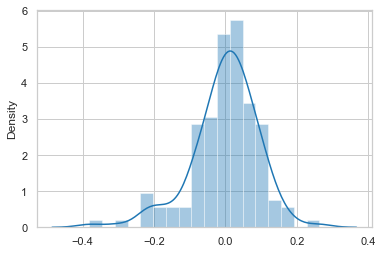

In [75]:
res_005 = y_test - y_pred_005
sns.distplot(res_005)

### Conclusions drawn:
- Model built with all Features 27 has R2 Score as 81.2% on Test Data
- Model built with 14 Features 
  'const','temperature','humidity','windspeed','season_spring','season_winter','year_2019',
  'month_dec','month_nov','month_sep','is_holiday_not_holiday','weekday_saturday',
  'is_workingday_workingday','weather_lightrain','weather_mist'
  has R2 Score as 79.38% on Test Data
- Model built with 10 Features  
  'const','temperature','humidity','windspeed','season_spring','season_winter','year_2019',
  'weekday_saturday','is_workingday_workingday','weather_lightrain','weather_mist'
  has R2 Score as 78.6% on Test Data
  
So we will go with 10 Features model as final one.

In [76]:
np.abs(model.params).sort_values(ascending=False)

temperature                 0.436331
const                       0.284510
weather_lightrain           0.247163
year_2019                   0.233229
windspeed                   0.154540
humidity                    0.152070
season_winter               0.105199
season_spring               0.081236
month_nov                   0.079276
month_dec                   0.073200
month_sep                   0.063536
weather_mist                0.062086
month_jan                   0.054070
month_jul                   0.051107
is_holiday_not_holiday      0.050660
weekday_saturday            0.038701
month_feb                   0.037133
is_workingday_workingday    0.028016
month_may                   0.024481
weekday_monday              0.017518
weekday_sunday              0.016057
weekday_tuesday             0.015984
month_jun                   0.012353
month_oct                   0.012236
month_mar                   0.007472
season_summer               0.003611
month_aug                   0.001304
w